In [1]:
#Importando as libs necessárias
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import requests
path = "../data/"

## Dados Abertos Câmara dos Deputados

Para este projeto iremos acessar a base de dados disponibilizada pelo Governo Federal afim de analisar os dados referentes aos gastos públicos dos nossos deputados e senadores. Esta política de dados abertos foi iniciada em 2016 no governo de Dilma Roussef, com o Decreto 8.777, que instaurou a [Política de Dados Abertos do Poder Executivo federal](http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/D8777.htm). 


Sendo assim, iremos verificar, analisar, comparar, criar algumas perguntas/observações sobre os dados e reponde-las com os mesmos.

Esses dados estão disponibilizados nos portais de Dados Abertos do **Senado Federal** e da **Câmara dos Deputados**. 
 

### Escopo do trabalho

- Neste trabalho iremos usar alguns parâmetros para focar nossos esforços em dados mais proximos da nossa realidade, portanto iremos trabalhar apenas com  a analise dos parlamentares do estado do Nordeste.  
  
  
- Dessa forma, algumas pesquisas foram feitas anteriormente e durante o projeto, afim de tornar as comparações e analisés mais coerentes e consistentes para conseguirmos visualizar melhor e encontrar informações a partir dos gastos e dos dados disponibilizados pelo projeto **[serenata_de_amor](https://serenata.ai/),** que também sera amplamente utilizado neste trabalho.


* **Serenata de amor** é um projeto aberto que usa ciência de dados com a finalidade de fiscalizar gastos públicos e compartilhar as informações de forma acessível a qualquer pessoa. Faz uso da *Rosie*, uma inteligência artificial capaz de analisar os gastos reembolsados pela Cota para Exercício da Atividade Parlamentar *(CEAP)*, de deputados federais e senadores, feitos em exercício de sua função, identificando suspeitas e incentivando a população a questioná-los.
    * Para tornar estas informações acessiveis, foi criado *Jarbas* um site onde é possível navegar pelos gastos e descobrir mais sobre cada suspeita, de maneira simples e descomplicada, que é onde começa o trabalho de validar uma suspeita levantada pela Rosie.


> Para iniciar, necessitamos pegar os nossos DataFrames, que serão retirados do serenata, e atribui-los, de forma organizada, às nossas váriaveis.


> Iremos utilizar os dados dos deputados do nordeste, como dito anteriormentge, dos anos de 2018 e 2019, para poder ter algo mais rescente e também abrangir um ano de eleição para poder melhorar nossas comparações. 

> Utilizaremos a biblioteca *Requests* para fazer chamadas à API da Câmara e Senado.

In [2]:
# Capturando os dados da API das tabelas do serenata
deputados_Nordeste_2019 = requests.get("https://dadosabertos.camara.leg.br/api/v2/deputados?siglaUf=MA&siglaUf=CE&siglaUf=PI&siglaUf=BA&siglaUf=SE&siglaUf=AL&siglaUf=PE&siglaUf=PB&siglaUf=RN&siglaUf=&ordem=ASC&ordenarPor=nome", headers={'Accept':'application/json'}).json()
deputados_Nordeste_2018 = requests.get('https://dadosabertos.camara.leg.br/api/v2/deputados?siglaUf=MA&siglaUf=CE&siglaUf=PI&siglaUf=BA&siglaUf=SE&siglaUf=AL&siglaUf=PE&siglaUf=PB&siglaUf=RN&siglaUf=&dataInicio=2018-01-01&dataFim=2018-12-31', headers= {'Accept':'application/json'}).json()
df_deputados_serenata_2018 = pd.read_csv(path+'Ano-2018.csv', sep=';')
df_deputados_serenata_2019 = pd.read_csv(path+'Ano-2019.csv', sep=';')

Colocaremos os nomes dos deputados nordestinos, de 2018 e 2019, em váriaveis para facilitar nosso trabalho:

In [3]:
nomes_deputados_nordeste_2018 = [dep['nome'] for dep in deputados_Nordeste_2018['dados']]
nomes_deputados_nordeste_2019 = [dep['nome'] for dep in deputados_Nordeste_2019['dados']]

Selecionando os parlamentares apenas do nordeste:

In [4]:
df_deputados_nordeste_2018 = df_deputados_serenata_2018[df_deputados_serenata_2018
                                                   ['txNomeParlamentar'].isin(nomes_deputados_nordeste_2018)]

df_deputados_nordeste_2019 = df_deputados_serenata_2019[df_deputados_serenata_2019
                                                   ['txNomeParlamentar'].isin(nomes_deputados_nordeste_2019)]

**Qual é o gasto anual *geral* dos deputados?**
 * Partindo desta questão um tanto quanto simples, mas automática, pegaremos a soma dos gastos de todos os deputados do nordeste para cada ano, afim de verificar o valor total. Utilizamos a coluna 'vlrLiquido' para acessar este dado:

Soma das notas fiscais emitidas deputados nordestinos em 2018, que serão pagas pela **CEAP**

In [5]:
df_deputados_nordeste_2018['vlrLiquido'].sum()

66674902.70999999

Soma das notas fiscais emitidas deputados nordestinos em 2019(até o momento), que serão pagas pela **CEAP**

In [6]:
df_deputados_nordeste_2019['vlrLiquido'].sum()

47662447.67

* Com isso, já podemos comparar os valores totais de cada ano e ver em qual ano possuiu a maior despeza com relação as notas fiscais. Vemos que em 2018 os gastos foram maiores em relação a 2019. 
Possiveis motivos para isso podem estar dentro do fato de 2018 ter sido ano de eleição.

## CEAP por deputado

> Iremos acessar a Cota para Exercício da Atividade Parlamentar(CEAP) por deputado para podermos ver seus respectivos gastos, utilizaremos o *groupby* nas colunas 'txNomeParlamentar' e 'vlrLiquido' para poder organizar e comparar esses dados.  

In [7]:
ceap_deputado_2018 = df_deputados_nordeste_2018.groupby(df_deputados_nordeste_2018['txNomeParlamentar']).sum()['vlrLiquido'].sort_values(ascending=False)

**Quais são os gastos individuais de cada deputado?**

* Utilizaremos gráficos para mostrar os maiores e menores gastos de 15 deputados nos respectivos anos.

Os 15 deputados que *mais* gastaram no ano de 2018.

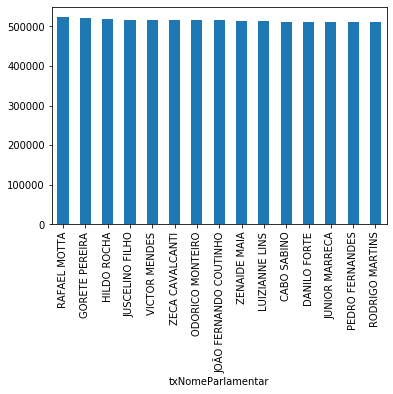

In [8]:
ceap_deputado_2018[:15].plot.bar()

---

Deputados que *menos* gastaram no ano de 2018

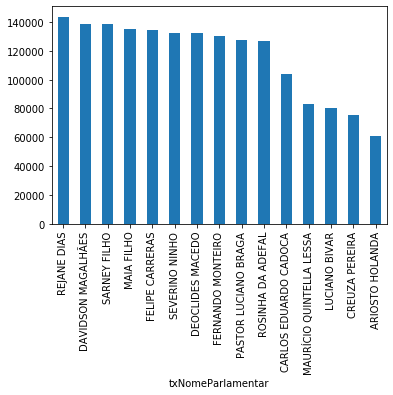

In [9]:
ceap_deputado_2018[-15:].plot.bar()

In [10]:
ceap_deputado_2019 = df_deputados_nordeste_2019.groupby(df_deputados_nordeste_2019['txNomeParlamentar']).sum()['vlrLiquido'].sort_values(ascending=False)

Deputados que *mais* gastaram, mais usaram a CEPA em 2019.

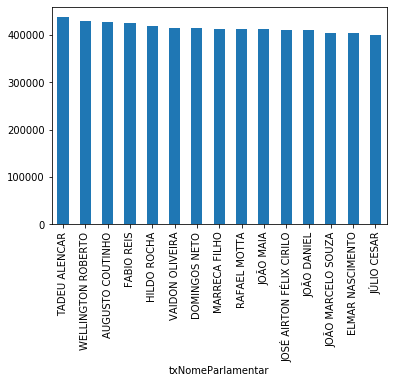

In [11]:
ceap_deputado_2019[:15].plot.bar()

---

Deputados que *menos* gastaram em 2019.

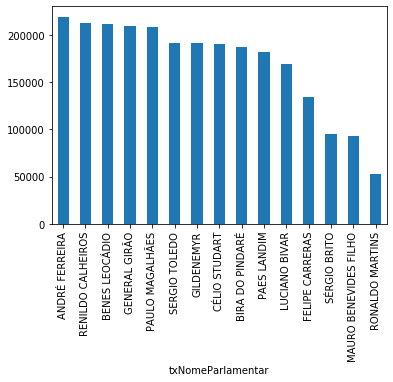

In [12]:
ceap_deputado_2019[-15:].plot.bar()

* Partindo dos números obtidos com os 15 deputados que mais e menos gastaram nos anos de 2018/19.

Podemos ver que os gastos individuais foram maiores no ano de 2018 e estes também não tiveram muita variação (não sairam da casa dos 500Mil).

O deputado que mais gastou em 2018 teve mais de 500Mil. O que menos gastou teve em torno de 60Mil. Comparando com o de 2019, que o maior teve mais de 400Mil e o menor em torno de 50Mil.

Também vemos que alguns nomes se repetem nos dois anos como fazendo parte dos maiores gastos, são eles: Rafael Motta e Hildo Rocha. Deputados que gastaram, individualmente, mais de 400Mil por ano. Ou seja, apenas esses dois, gastaram nos dois anos quase 2Milhões pelo CEAP.

---

### Analise dos gastos dos deputados nordestidos dentre periodos mensais

- Aqui agrupamos a coluna de valor total da nota fiscal emitida pelo deputado (*vlrLiquido*) pelo número do mês dessa nota. Assim conseguimos visualizar como os gastos totais por mês se comportam no decorrer do ano.

    Utilizando o *groupby* no dataframe dos deputados de 2018, usando as colunas 'numMes' e 'vlrLiquido', pegares os gastos mensais em um novo conjunto de dados e posteriormente faremos algumas medidas em cima do dataframe obtido:

In [13]:
gastos_mensais_2018 = df_deputados_nordeste_2018.groupby(['numMes']).sum()['vlrLiquido']
gastos_mensais_2018

numMes
1     4839066.40
2     5649604.80
3     6390355.89
4     5920585.26
5     6740744.16
6     4475442.11
7     4604694.33
8     3933457.20
9     2851324.04
10    6518182.17
11    7284755.95
12    7466690.40
Name: vlrLiquido, dtype: float64

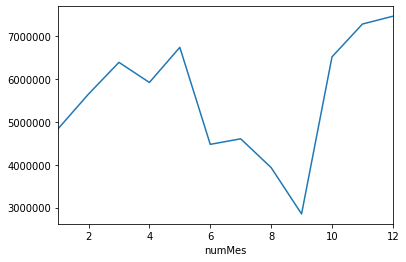

In [14]:
gastos_mensais_2018.plot()

In [20]:
#Menor valor
gastos_mensais_2018.min()

2851324.039999991

In [21]:
#Maior valor
gastos_mensais_2018.max()

7466690.39999996

In [22]:
#Média de gastos
gastos_mensais_2018.mean()

5556241.892499972

In [38]:
#Soma dos gastos
gastos_mensais_2018.sum()

66674902.709999666

A partir do gráfico gerado com os gastos mensais no ano de *2018*, é possivel verificar que:
    
    
 * Mês com menor gasto foi em Setembro, em torno de 2,8 Milhões; e com o Maior gasto foi em Dezembro, com mais de 7,4 Milhões; e a média está entre os 5,5 Milhões.
 
 * Dentre os meses 6 e 9, os gastos diminuiram drasticamente. Isso aconteceu, possivelmente, pela ocorrência do periodo eleitoral, onde certas atividades são suspensas e/ou possuem limites de gastos que poderão ser custeados pela CEAP.

>>Aplicando a mesma operação para o ano de 2019 teremos:

In [28]:
gastos_mensais_2019 = df_deputados_nordeste_2019.groupby(['numMes']).sum()['vlrLiquido']
gastos_mensais_2019

numMes
1     2499828.98
2     4713350.08
3     5140076.34
4     5790773.61
5     5957824.71
6     5359022.57
7     5424205.37
8     6021171.80
9     3941218.43
10    2647030.42
11     167945.36
Name: vlrLiquido, dtype: float64

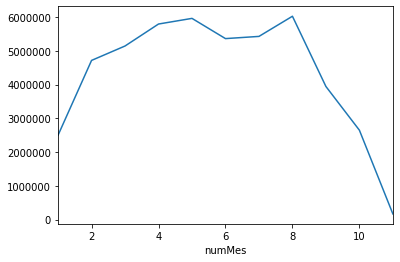

In [29]:
gastos_mensais_2019.plot()

In [30]:
#Menor valor
gastos_mensais_2019.min()

167945.3600000001

In [34]:
#Maior valor
gastos_mensais_2019.max()

6021171.800000048

In [32]:
#Média dos valores
gastos_mensais_2019.mean()

4332949.78818184

In [39]:
#Soma dos gastos
gastos_mensais_2019.sum()

47662447.67000024

In [40]:
#Diferença dos gastos entre 2018 e 2019
gastos_mensais_2018.sum() - gastos_mensais_2019.sum()

19012455.039999425

Partindo do gráfico gerado pelos gastos mensais no ano de *2019*:


 - Os dados no ano de 2019 se encerram na metade do mês 11, então não podemos ter uma noção absoluta do maior e menor valor já que estes poderiam ocorrer nos ultimos mese. Entretando, dentro dos dados que temos, podemos ver que:
 - Menor gasto, tirando o mês de Novembro, foi em Janeiro, em torno 2,4 Milhões; o maior gasto foi no mês de Agosto, em torno de 6 Milhões; e a média dos gastos foi de 4,3 Milhões.
 - Diferentemente de 2018, os gastos de 2019 não apresentaram uma queda/aumento muito alto repentinamente, o que reforça ainda mais que isso ocorreu e 2018 pela eleição. 
 
 
 - A partir de uma análise simultanea doa dados, vemos que, no geral, 2018 teve uma quantidade total maior de gastos (cm uma diferença de 19 Milhôes), com o maior valor único entre os dois anos, por mais que tenha sido ano de leição. Entretanto, isto ainda fica a depender dos gastos restantes do mês de novembro e dezembro de 2019.

### Analise de gastos por partido no ano de 2018

- É interessante analisarmos os gastos com a CEAP por partido, tendo em vista que alguns partidos tem uma visibilidade maior e integrantes importantes dentro da camara que outros (o que pode ser visto na Series gerada), mostrando uma grande disparidade de gastos entre os mesmos.  
- Como esses gastos englobam todos os custeios dos deputados, inclusive viagens e etc., vemos como certos partidos tem mais voz e presença.

In [41]:
gasto_partido_2018 = df_deputados_nordeste_2018.groupby('sgPartido').sum()['vlrLiquido'].sort_values(ascending=False)
gasto_partido_2018

sgPartido
PT               6545949.17
PP               6394848.06
PSB              5541203.99
PSD              4982441.06
PSDB             4694972.08
DEM              4677723.41
MDB              4541290.41
PDT              3996984.04
PR               3512284.18
PTB              3210208.20
PRB              2828139.60
PCdoB            2555847.36
PODE             2554547.98
AVANTE           2117361.65
PROS             1878699.47
PSC              1588725.02
PATRI            1393752.02
SOLIDARIEDADE    1065207.39
PPS               967295.60
PHS               935136.99
PPL               473913.56
PV                138390.52
PSL                79980.95
Name: vlrLiquido, dtype: float64

In [53]:
#Média dos valores
gasto_partido_2018.mean()

2898908.81347825

In [54]:
#Desvio absoluto
gasto_partido_2018.mad()

1661636.2143667156

In [57]:
#Diferença do menor para o maior, Amplitude
gasto_partido_2018.max() - gasto_partido_2018.min()

6465968.2199999895

- Separando os gastos por partido podemos ver que existe uma grande diferença entre os mesmos, utilizando o desvio padrão absoluto e a amplitude para isso. Sendo assim, já esperavamos essa discrepancia grande devido ao fato do impacto, participação e reconhecimento de cada partido.

Mais a frente iremos comparar e relacionar o gastos do partido com sua quantidade de integrantes e as suas atividades.

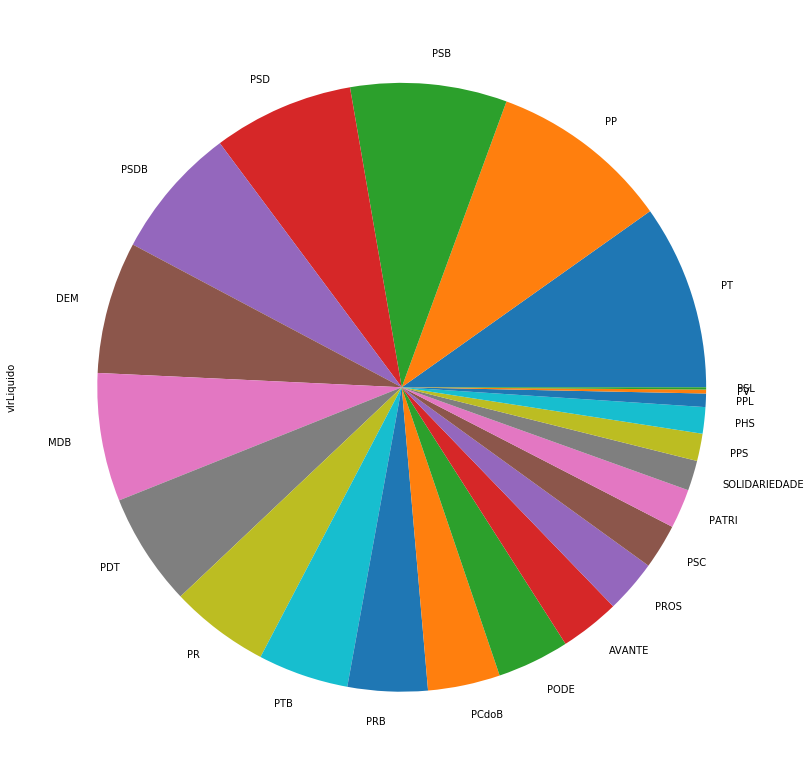

In [42]:
gasto_partido_2018.plot.pie(figsize = (14,14))

- Graficamente é facilmente perceptivel que poucos partidos detem grande parte dos gastos com a CEAP. Vemos que somente 3 partidos gastam mais de 25% do total;


- Que apenas 6 partidos gastam quase 50% do toal, o equivalente aos outros 17 partidos;

In [43]:
deputado_partido_2018 = df_deputados_nordeste_2018.groupby('txNomeParlamentar').first()['sgPartido']
deputado_partido_2018 = deputado_partido_2018.value_counts()

- Agora, contamos quantos deputados estão alocados em cada partido, apartir do dataframe já existente. Essa contagem irá auxiliar na analise de gastos por partido, facilitando e possibilitando uma analise gráfica.

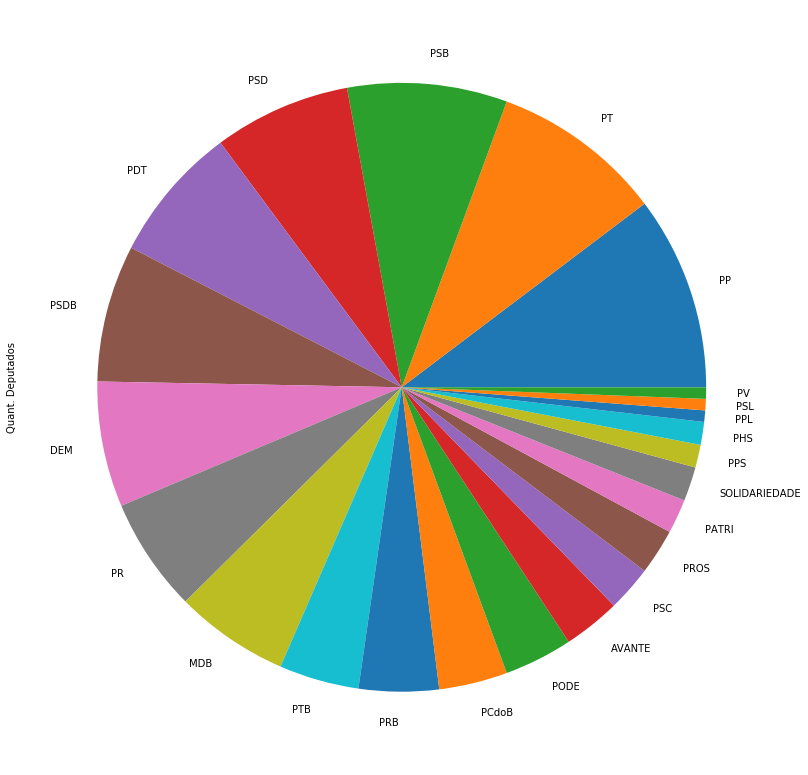

In [44]:
deputado_partido_2018.plot.pie(figsize = (14,14), label = 'Quant. Deputados')